In [50]:
import os 
import cv2
import numpy as np 
import random
import torch 
import torchvision 
import mediapipe as mp
from tqdm import tqdm
from PIL import Image
from matplotlib import pyplot as plt
REBUILD_DATA = True

In [19]:
MAPPINGS = [
'A',
'B',
'C',
'D',
'E',
'F',
'G',
'H',
'I',
# 'J',
# 'K',
# 'L',
# 'M',
# 'N',
# 'O',
# 'P',
# 'Q',
# 'R',
# 'S',
# 'T',
# 'U',
# 'V',
# 'W',
# 'X',
# 'Y'
# 'Z',
# 'del',
# 'space',
# 'nothing'
]

In [20]:
len(MAPPINGS)

9

In [21]:
LABEL_PATHS = {}
base_path = 'C:\\Tarun\\FYP\\asl_to_speech\\model\\data\\tuntun_only_train'
for index, letter in enumerate(MAPPINGS):
            LABEL_PATHS[base_path+'\\'+letter] = index


In [22]:
mphands = mp.solutions.hands
hands = mphands.Hands(max_num_hands=1)

def get_piped_img(img):
    
    result = hands.process(img)
    hand_landmarks = result.multi_hand_landmarks
    handedness = result.multi_handedness
    
    h,w,c = img.shape
    ann = None
    box_height = 200
    if hand_landmarks and handedness[0].classification[0].label == 'Left':
        for handLMs in hand_landmarks:
            x_max = 0
            y_max = 0
            x_min = w
            y_min = h
            for lm in handLMs.landmark:
                x, y = int(lm.x * w), int(lm.y * h)
                if x > x_max:
                    x_max = x
                if x < x_min:
                    x_min = x
                if y > y_max:
                    y_max = y
                if y < y_min:
                    y_min = y
        ann = img[y_min-box_height:y_max+box_height, x_min-box_height:x_max+box_height]
    return ann

In [140]:
def rotate_image(image,deg):
    rows, cols = image.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2), deg, 1)
    image = cv2.warpAffine(image, M, (cols, rows))
    return image


In [141]:
def transformation_image(image):
    rows, cols= image.shape
    pts1 = np.float32([[50, 50], [100, 50], [50, 100]])
    pts2 = np.float32([[10, 100], [100, 50], [100, 50]])
    M = cv2.getAffineTransform(pts1, pts2)
    image = cv2.warpAffine(image, M, (cols, rows))

In [142]:
def random_crop(image,cropped_size):
    height = np.random.randint(image.shape[0]-cropped_size)
    width = np.random.randint(image.shape[1]-cropped_size)    
    image = image[height:height+cropped_size,
                 width:width+cropped_size]
    return image

In [143]:
from collections import defaultdict

In [151]:
class HandSigns():    
    class_count = defaultdict(int)
    def __init__(self,base_path):
        self.base_path = base_path
        self.IMG_SIZE = 100
        self.LABEL_PATHS = {}
        self.training_data = []
        for index, letter in enumerate(MAPPINGS):
            self.LABEL_PATHS[self.base_path+'\\'+letter] = index
        
    def make_training_data(self):
        for label_path in self.LABEL_PATHS:
            for f in tqdm(os.listdir(label_path),desc=label_path):
                self.read_images(label_path, f)
            
            np.random.shuffle(self.training_data)
            np.save('mediapipe_all_data_augmented_single_y.npy',self.training_data)

            
    def read_images(self, label_path, f):        
        if (os.path.isfile(label_path+'\\'+f)) and (f.split('.')[-1] in ['jpg','png','jpeg']):
            try:
                path = os.path.join(label_path, f)
                img = cv2.imread(path)
                img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#                 img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img3 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img1 = random_crop(img1,int(img1.shape[1]*0.85))
#                 img2 = get_piped_img(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
                img3 = rotate_image(img3,random.randint(-15,15))
                img1 = cv2.resize(img1, (self.IMG_SIZE, self.IMG_SIZE))
#                 img2 = cv2.resize(img2, (self.IMG_SIZE, self.IMG_SIZE))
                img3 = cv2.resize(img3, (self.IMG_SIZE, self.IMG_SIZE))
                self.training_data.append([np.array(img1), self.LABEL_PATHS[label_path]])
                self.class_count[label_path[-1]] +=1
#                 self.training_data.append([np.array(img2), np.eye(len(self.LABEL_PATHS))[self.LABEL_PATHS[label_path]]])
#                 self.class_count[label_path[-1]] +=1

                self.training_data.append([np.array(img3), self.LABEL_PATHS[label_path]])
                self.class_count[label_path[-1]] +=1

            except Exception as e:
                raise(e)

In [152]:
BASE_PATH = 'C:\\Tarun\\FYP\\asl_to_speech\\model\\data\\tuntun_only_train'
if REBUILD_DATA:
    ASL_DATA = HandSigns(BASE_PATH)
    errors = ASL_DATA.make_training_data()

C:\Tarun\FYP\asl_to_speech\model\data\tuntun_only_train\A: 100%|███████████████████| 2205/2205 [00:45<00:00, 48.51it/s]
C:\Tarun\FYP\asl_to_speech\model\data\tuntun_only_train\B: 100%|███████████████████| 2218/2218 [00:45<00:00, 48.36it/s]
C:\Tarun\FYP\asl_to_speech\model\data\tuntun_only_train\C: 100%|███████████████████| 2250/2250 [00:46<00:00, 48.39it/s]
C:\Tarun\FYP\asl_to_speech\model\data\tuntun_only_train\D: 100%|███████████████████| 2225/2225 [00:45<00:00, 48.92it/s]
C:\Tarun\FYP\asl_to_speech\model\data\tuntun_only_train\E: 100%|███████████████████| 2364/2364 [00:48<00:00, 48.56it/s]
C:\Tarun\FYP\asl_to_speech\model\data\tuntun_only_train\F: 100%|███████████████████| 2323/2323 [00:49<00:00, 46.70it/s]
C:\Tarun\FYP\asl_to_speech\model\data\tuntun_only_train\G: 100%|███████████████████| 2136/2136 [00:44<00:00, 48.37it/s]
C:\Tarun\FYP\asl_to_speech\model\data\tuntun_only_train\H: 100%|███████████████████| 2316/2316 [00:49<00:00, 46.93it/s]
C:\Tarun\FYP\asl_to_speech\model\data\tu

In [153]:
ASL_DATA.class_count

defaultdict(int,
            {'A': 4410,
             'B': 4436,
             'C': 4500,
             'D': 4450,
             'E': 4728,
             'F': 4646,
             'G': 4272,
             'H': 4632,
             'I': 4302})

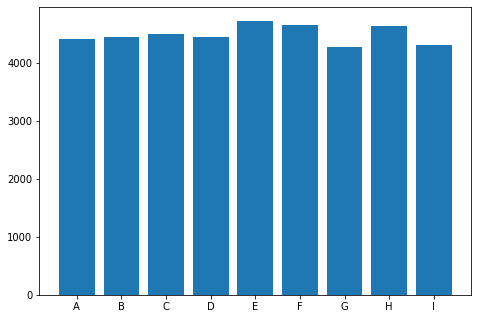

In [154]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classes = ASL_DATA.class_count.keys()
count = ASL_DATA.class_count.values()
ax.bar(classes,count)
plt.show()

In [157]:
training_data = np.load('mediapipe_all_data_augmented_single_y.npy',allow_pickle=True)
X = torch.Tensor([i[0] for i in training_data]).view(-1,1,100,100)
X= X/255.0
y = torch.Tensor([i[1] for i in training_data])

torch.save(X, 'aug_piped_X_tensor_single.pt')
torch.save(y, 'aug_piped_y_tensor_single.pt')

In [158]:
y[0]

tensor(6.)

In [127]:
len(training_data)

0

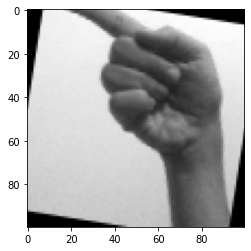

In [110]:
import matplotlib.pyplot as plt
plt.imshow(training_data[3][0], cmap="gray")
plt.show()


In [ ]:
a = get_piped_img(img)

In [ ]:
plt.imshow(img, cmap='gray')
plt.show()